In [1]:
import numpy as np # numpy module for linear algebra
import pandas as pd # pandas module for data manipulation
import matplotlib.pyplot as plt # module for plotting
from sklearn.model_selection import train_test_split #Splitting data into test and train sets
from sklearn.metrics import r2_score #for calculating r_square value
from sklearn.metrics import mean_squared_error #as the name says, to find the mean squared error value
from sklearn.preprocessing import StandardScaler # used to scale the data
import math #For computing math functions
import time # time library to get time
from IPython.display import Markdown as md #For displaying results in md
from scipy import stats # module For removing outliers in this program.

%matplotlib inline

In [2]:
# This function gives you the executions time of your algorithm
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [3]:
# import csv file using pandas
bags = pd.read_csv ('Data_miniproject.csv');
# remove cost feature 0 valued rows 
bags = bags[bags.Cost != 0]


# We are gonna eliminate outliers using z-scores from Scipy library.
z_scores = stats.zscore(bags)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
bags = bags[filtered_entries]


# Taking  dependent variables as X and independent variable(COST) as y
X = bags.iloc[:,1:6]
y = bags.iloc[:,0].values

# Scaling the Data so that computations will be much faster and also easily understood by machine while computing
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

# Splitting data into test and train sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [4]:
# calculating the cost 
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    # calculating the cost using the formula
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [5]:
# mini-batch algorithm coded in python
@timeit
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01, iterations=10, batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost          
    return theta, cost_history

In [6]:
learning_rate = 0.001
iterations = 10000

# If the features are n, then parameters should be n+1
# initializing theta to zero vector with n features + 1. +1 is added to calculate Wo.
theta = np.zeros(X_train.shape[1]+1)

# Concating a identity matrix of size (length of X_train,1) to X_train. so now we'll have an extra column to find Wo.
X_build = np.c_[np.ones((len(X_train), 1)), X_train]

# Calling the MGD algorithm to get theta and cost which says about converging. 
theta,cost_history = minibatch_gradient_descent(X_build,y_train,theta,learning_rate,iterations)

print("theta :",theta)

# Estimating the Modal
X_build1 = np.c_[np.ones((len(X_test), 1)), X_test]
predictions = X_build1.dot(theta)
y_pred_mgd = list(predictions)



'minibatch_gradient_descent'  2338.35 ms
theta : [374.85673074  55.45659766  50.91482535  35.07979595  66.96897685
 118.29414973]


Text(0, 0.5, 'Cost')

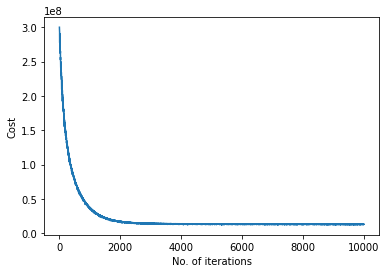

In [7]:
# Plotting the graph to check convergence.
n_iterations = [x for x in range(1,iterations+1)]
cost = list(cost_history)
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Here looking at the graph above, it started converging at around 5000 iterations only with learning_rate of 0.001

In [8]:

# Calculating Errors
mgd_mse = mean_squared_error(y_test,y_pred_mgd)
mgd_rmse = math.sqrt(mgd_mse)
mgd_rse = (mgd_rmse**2)*X_build1.shape[0]
mgd_rse /= X_build1.shape[0]-2
mgd_r2 = r2_score(y_test, y_pred_mgd, sample_weight=None, multioutput='uniform_average')

# Displaying Errors and score
dash = '-' * 90
print(dash)
print('{:>10} {:>20} {:^35} {:^10} '.format("MSE","RMSE","RSE","R SQUARE"))
print(dash)
print('{:<20}| {:>14} | {:^22}| {:^22} '.format(mgd_mse,mgd_rmse,mgd_rse,mgd_r2))
print(dash)

------------------------------------------------------------------------------------------
       MSE                 RMSE                 RSE                  R SQUARE  
------------------------------------------------------------------------------------------
10299.858146748293  | 101.48821678770543 |   11010.193191351624  |   0.896198760901734    
------------------------------------------------------------------------------------------


### Conclusion <br />

In [10]:
md("*As we can see the RSquare Score is **{}**. Saying that,this modal fits **{}%** which shows that the current modal is a good fit.*".format(mgd_r2, math.floor(mgd_r2*100)))

*As we can see the RSquare Score is **0.896198760901734**. Saying that,this modal fits **89%** which shows that the current modal is a good fit.*